<a href="https://colab.research.google.com/github/estebanapraez/CUR_python/blob/main/CUR_FGreen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DECOMPOSIÇÃO CUR** - Função de Green

Preparação dos modulos e livrarias necessárias para a leitura da função de Green e a implementação do algoritmo CUR

As dimensoẽs da função de Green referencia são (m,n)=(801,501)



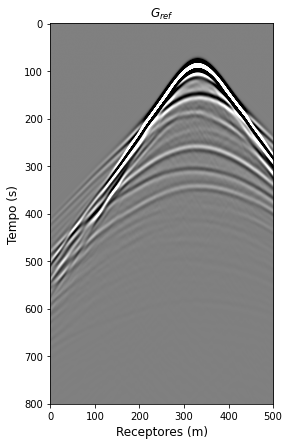

In [7]:
import numpy as np
import mdle_io as io
import mdle_CUR as cur
import imp
imp.reload(io)
imp.reload(cur)

nt = 801
nr = 501
ns = 1

FG_ref = io.read_data_func_F90("FGreen.ad",nt,nr,ns);
f="As dimensoẽs da função de Green referencia são (m,n)=({0},{1})\n".format(FG_ref.shape[0],FG_ref.shape[1])
print(f)
io.plot_sismograma(FG_ref,0.1)

Execução da fatoração CUR. Na presente etapa são avaliados varios valores do valor ̨$k$ a fim de atingir um critério de parada ($\text{erro}_{\text{NRMSE}}\le 0.015$). Adicionalmente, levando em conta que a seleção de colunas e linhas é de forma aléatoria, para cada valor de $k$ o algoritmo CUR é executado dez vezes ($N=10$). Para definir o critério de parada é utilizado o erro NRMSE, o qual é dado pela expressão
\begin{equation}
 \text{erro}_{\text{NRMSE}} = \sqrt{\dfrac{\sum_{i}^{m\times n} \left(G_{ref}^{i} - G_{k}^{i}\right)^{2}}{\sum_{i}^{m\times n} \left(G_{ref}^{i}\right)^{2}}}
\end{equation}

In [8]:
#Função para executar o CUR N vezes para o mesmo valor de k
def give_cur_vals(A, k, N=10):
  c, u, r = cur.cur_decompose(A, k, return_idx=False)
  err = cur.give_error(A, c@u@r)
  for i in range(N):
    ctmp, utmp, rtmp = cur.cur_decompose(A, k, return_idx=False)
    err_temp = cur.give_error(A, ctmp@utmp@rtmp)
    if err_temp < err:
      err = err_temp
      c = ctmp
      u = utmp
      r = rtmp
  return c, u, r, err

#Inicia a avaliação do CUR para diferentes valores de k
err = 1.0       #Erro inicial
tol = 0.015     #Critério de parada
k = 0           #Inteiro para acumular o valor máximo de k
errors = []     #Lista vazía para salvar os erros

"""
Enquanto o critério de parada não é cumprido, ao valor de k
é adicionada uma unidade
"""
while err >= tol:
  C, U, R, err = give_cur_vals(FG_ref, k+1, N=10)
  k = k + 1
  errors.append(err)

Em seguida, é apresentada uma gráfica com os erros correspondientes a cada valor de $k$, adicionalmente mostramos a função de Green reconstruída e a diferença quando comparada com a função referencia.

O erro para k=1 é igual a 1.000e+00
O erro para k=2 é igual a 9.274e-01
O erro para k=3 é igual a 9.199e-01
O erro para k=4 é igual a 8.094e-01
O erro para k=5 é igual a 6.750e-01
O erro para k=6 é igual a 5.656e-01
O erro para k=7 é igual a 5.624e-01
O erro para k=8 é igual a 5.268e-01
O erro para k=9 é igual a 4.678e-01
O erro para k=10 é igual a 4.124e-01
O erro para k=11 é igual a 3.825e-01
O erro para k=12 é igual a 3.668e-01
O erro para k=13 é igual a 2.583e-01
O erro para k=14 é igual a 2.624e-01
O erro para k=15 é igual a 2.454e-01
O erro para k=16 é igual a 2.170e-01
O erro para k=17 é igual a 1.957e-01
O erro para k=18 é igual a 1.733e-01
O erro para k=19 é igual a 1.707e-01
O erro para k=20 é igual a 1.618e-01
O erro para k=21 é igual a 1.561e-01
O erro para k=22 é igual a 1.472e-01
O erro para k=23 é igual a 1.419e-01
O erro para k=24 é igual a 1.313e-01
O erro para k=25 é igual a 1.200e-01
O erro para k=26 é igual a 1.253e-01
O erro para k=27 é igual a 1.082e-01
O erro par

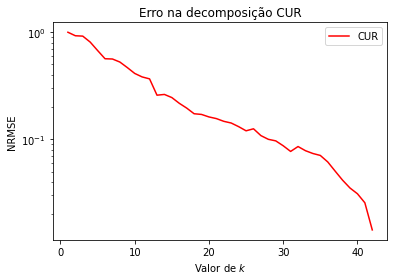


As dimensoes de C sao (m,n)=(801,157)
As dimensoes de U sao (m,n)=(157,155)
As dimensoes de R sao (m,n)=(155,501)



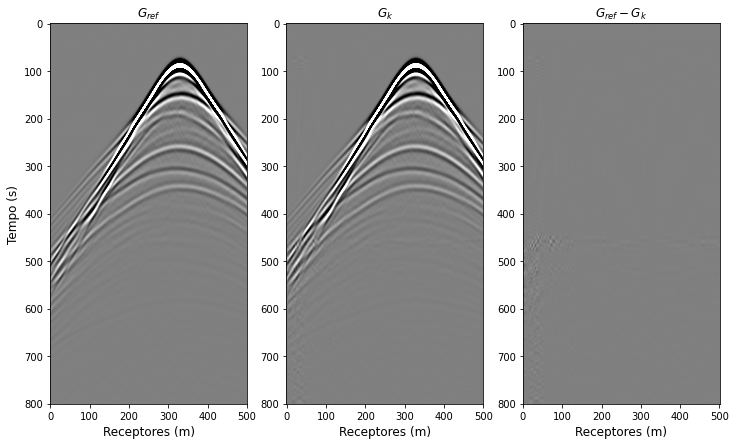

In [9]:
#Função que gera a gráfica com os erros para cada valor de k
def plot_error(k, errors):
  import matplotlib.pyplot as plt
  x = [i for i in range(1, k+1)]
  for i in x:
    f="O erro para k={0} é igual a {1:.3e}".format(i, errors[i-1])
    print(f)
  print()
  plt.plot(x, errors, 'r-', label='CUR')
  plt.xlabel("Valor de $k$")
  plt.ylabel("NRMSE")
  plt.title("Erro na decomposição CUR")
  plt.legend(loc='best')
  plt.yscale("log")
  plt.show()

#Geração da gráfica com os erros para cada valor de k
plot_error(k, errors)
print()

#Impressão das dimensões das matrices C, U e R
f="As dimensoes de C sao (m,n)=({0},{1})".format(C.shape[0],C.shape[1])
print(f)
f="As dimensoes de U sao (m,n)=({0},{1})".format(U.shape[0],U.shape[1])
print(f)
f="As dimensoes de R sao (m,n)=({0},{1})".format(R.shape[0],R.shape[1])
print(f)
print()

#Gráfica da função de Green referencia, a reconstruida e a sua diferença
io.plot_sismograma(FG_ref,0.1,C@U@R,FG_ref-C@U@R)
